In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import interpolate,integrate






**_Interpolation method_**:Mini-Projet

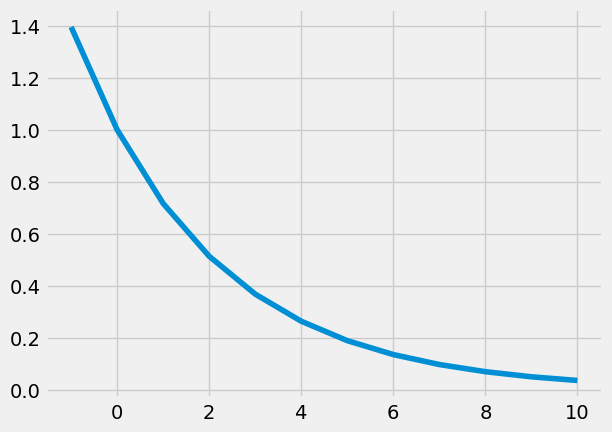

In [4]:
x = np.arange(-1,11)
y = np.exp(-x/3.0)
plt.style.use('fivethirtyeight') #fivethirtyeight is a style sheet in python
plt.plot(x,y)

Text(0.5, 1.0, 'Actual Function')

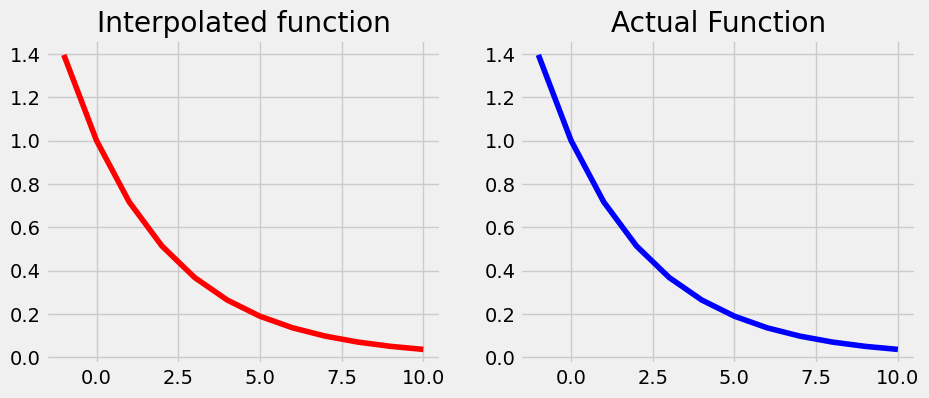

In [5]:
f = interpolate.interp1d(x,y)
#values from interpolated function
l = []
for i in x:
  v = float(f(i))
  l.append(v)
    
y_int = np.array(l)


plt.figure(figsize=(10,4)) # (12,4)represent respectively (width,height)
plt.subplot(1,2,1) #the figure has 1 row, 2 columns, and this plot is the first plot.
plt.plot(x,y_int,'r')
plt.title('Interpolated function')
plt.subplot(1,2,2)
plt.plot(x,y,'b')
plt.title('Actual Function')



**_Comparing the Actual function and Inerpolated function using integration_**

We do this since we cannot see any visible difference,Hence The integrated values are the best way to compare

In [6]:
ans,err = integrate.quad(f,0,10)
print(f"1.The integration of interpolated fn gives {ans}")

intg = integrate.simps(y[1:-1],x[1:-1])
print(f"1.The integration of actual fn gives {intg}")

1.The integration of interpolated fn gives 2.9197153790964223
1.The integration of actual fn gives 2.8550038226912573


Conclusion: _Interpolation can be said to be a pretty good estimate of the actual function!_
     




**_IPR: Inflow Performance Relationship_**:Mini-projet

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**_Vogel'equation or wiggins'equation IPR_**

The Equation stand that: Qmax = q1/(1 - 0.2*(pwf1/Pres) - 0.8*(pwf1/Pres)**2)

**_Experimental dataset_**:

Reservoir pressure = 3000 psia'

Tested flowing bottom-hole pressure, pwf 1 = 2000 psia

Tested production rate at pwf 1, q1 =500 stb=day

Tested flowing bottom-hole pressure, pwf 2 = 1000 psia

Tested production rate at pwf 2, q2 = 800 stb=day

In [8]:
Pres = float(input("Enter the reservoir pressure: "))

pwf1 = float(input("Enter the test pwf1: "))
q1 = float(input("Enter the test flow rate(at pwf1): "))

pwf2 = float(input("Enter the test pw2: "))
q2 = float(input("Enter the test flow rate(at pwf2): "))

Enter the reservoir pressure: 3000
Enter the test pwf1: 2000
Enter the test flow rate(at pwf1): 500
Enter the test pw2: 1000
Enter the test flow rate(at pwf2): 800


**_As per Vogel's equation:_**  Qmax = q1/(1 - 0.2(pwf1/Pr) - 0.8(pwf1/Pr)**2)

In [9]:
qmax = q1/(1 - 0.2*(pwf1/Pres) - 0.8*(pwf1/Pres)**2)
qmax   

978.2608695652175

In [10]:
J_star = (1.8*qmax)/Pres ##Standing's method (used to predict future inflow performance relationship of a well as a function Rsev Press)
J_star

0.5869565217391305

In [11]:
q = np.linspace(0,qmax,50)

In [12]:
pwf = 0.125*Pres*((81 - 80*(q/qmax))**0.5 - 1)

**_Wellbore Performance : Pottman and Carpenter_**

Pwf - Pwh = (rho + k/rho)*h/144
rho = Avg density, k is function of q^2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Pwf at bottomhole node, psia')

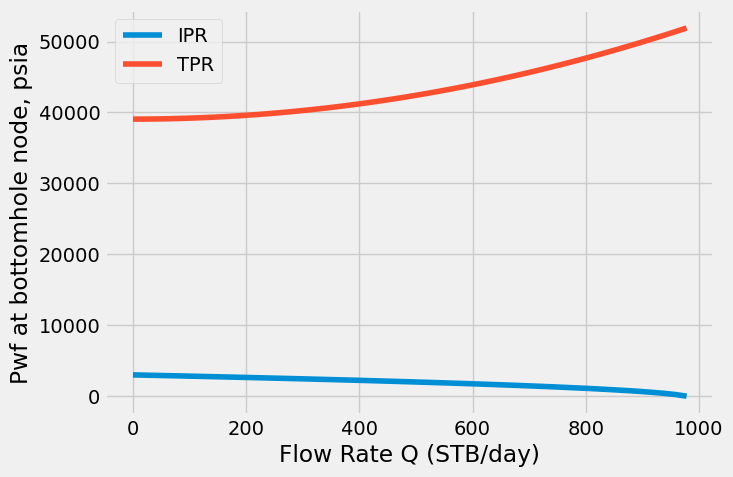

In [13]:
rho = 19.53 #lb/ft3
M = 495.66
f = 0.002
D = 1.66/12

k = (f*(q**2)*(M**2))/(7.4*(10**10)*(D**5))
pwf_out = (rho + k/rho)*2000

plt.figure(figsize=(7,5))
sns.lineplot(q,pwf,label='IPR')
sns.lineplot(q,pwf_out,label='TPR')

plt.xlabel('Flow Rate Q (STB/day)')
plt.ylabel('Pwf at bottomhole node, psia')


_**Problem statement**_

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
#Input Data 

q = 250 #stb/d,stabilized flow rate

tp = 460 #hrs,period of time

Pi = 4412 #psia,initial reservoir pressure

h = 69 #ft,formation thickness

phi = 3.9/100 #porosity

ct = 17E-6 #psi-1,total compressibility

B = 1.136 #rb/stb,oil formation volume factor

mu = 0.8 #cp,viscosity

rw = 0.198 #ft,wellbore radius

**_Nodal Analysis With Python experimental mini-project_**



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
     

In [17]:
#First Let's Get the IPR dataset. (Source : PetroWiki)

ipr = pd.DataFrame({'Pwf':[4000,3500,3000,2500,2000,1500,1000,500,14.7],
                    'Q': [0,1999,3094,3902,4512,4963,5275,5458,5519]})

ipr
     

,Pwf,Q
0,4000.0,0
1,3500.0,1999
2,3000.0,3094
3,2500.0,3902
4,2000.0,4512
5,1500.0,4963
6,1000.0,5275
7,500.0,5458
8,14.7,5519


In [18]:
#Now TPR Data

q = np.arange(1000,6500,500)

p_190 = [1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609]

p_2375 = [1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824]

p_2875 = [1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493]

tpr = pd.DataFrame({'q':q, 'Pwf(1.90" tbg)':p_190, 'Pwf(2.375"tbg)': p_2375,'Pwf(2.875"tbg)':p_2875})

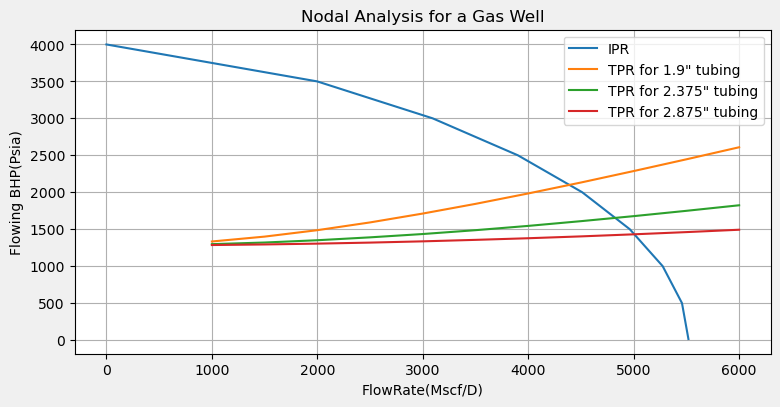

In [19]:
#Let's Plot them now. 
plt.figure(figsize=(8,4))

plt.style.use('default')

plt.plot(ipr['Q'], ipr['Pwf'], label = 'IPR', linewidth=1.5)

plt.plot(tpr['q'],tpr['Pwf(1.90" tbg)'],label='TPR for 1.9" tubing', linewidth=1.5)
plt.plot(tpr['q'],tpr['Pwf(2.375"tbg)'],label='TPR for 2.375" tubing', linewidth=1.5)
plt.plot(tpr['q'],tpr['Pwf(2.875"tbg)'],label='TPR for 2.875" tubing', linewidth=1.5)

plt.xlabel('FlowRate(Mscf/D)')
plt.ylabel('Flowing BHP(Psia)')
plt.title('Nodal Analysis for a Gas Well')

plt.grid()

plt.legend(loc='best')


**_Gas Inflow Performance Analysis: mini-project experimental_**



This code is useful to quickly find out the parameters and model an IPR for a gas reservoir, with just a few test data points.



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**_Problem Statement:_**


A gas well was tested using a three-point conventional deliverability test. Data recorded during the test are given

In [21]:
data = {'Pwf' : [1952,1700,1500,1300] , 
       'm(P)' : [316*10**6 , 245*10**6, 191*10**6, 141*10**6],
       'Qg(Mscf/d)' : [0, 2624.6, 4154.7 , 5425.1]}

In [22]:
df = pd.DataFrame(data) #generate a data set as a csv,excel or spredsheet

In [23]:
df

,Pwf,m(P),Qg(Mscf/d)
0,1952,316000000,0.0
1,1700,245000000,2624.6
2,1500,191000000,4154.7
3,1300,141000000,5425.1


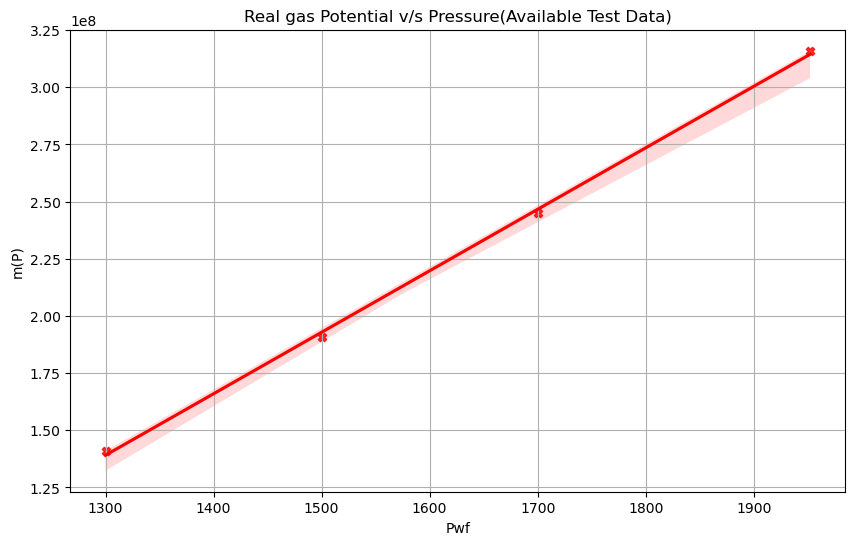

In [24]:
plt.figure(figsize=(10,6))

sns.regplot(x='Pwf' , y='m(P)' , data=df, color='r', marker='X', ci=95)

plt.title('Real gas Potential v/s Pressure(Available Test Data)')
plt.grid()

**_Using the Back-Pressure Equation._**

In [25]:
df['Pwf2'] = df['Pwf']**2

In [26]:
pr = 1952

df['Pr2 - Pwf2'] = pr**2 - df['Pwf']**2

In [27]:
df

,Pwf,m(P),Qg(Mscf/d),Pwf2,Pr2 - Pwf2
0,1952,316000000,0.0,3810304,0
1,1700,245000000,2624.6,2890000,920304
2,1500,191000000,4154.7,2250000,1560304
3,1300,141000000,5425.1,1690000,2120304


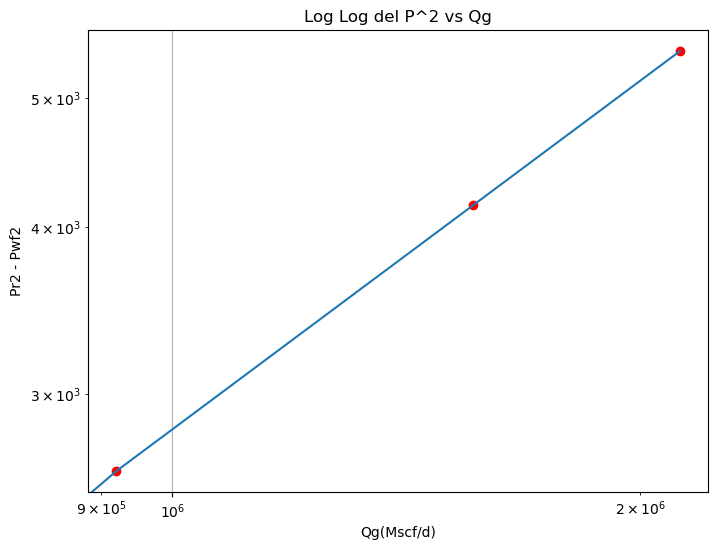

In [28]:
#Now plot (Pr2 - Pwf2) vs Qg on a Log Log scale

plt.figure(figsize=(8,6))
plt.loglog(df['Pr2 - Pwf2'] , df['Qg(Mscf/d)'])

plt.scatter(df['Pr2 - Pwf2'] , df['Qg(Mscf/d)'] , color='r')

plt.xlabel('Qg(Mscf/d)')
plt.ylabel('Pr2 - Pwf2')

plt.title('Log Log del P^2 vs Qg')

plt.grid()

**_Let's Pause and have a look at the equations:_**


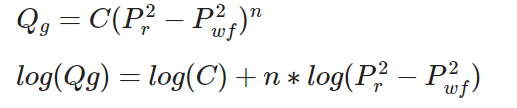

In [29]:
x = np.log(df['Pr2 - Pwf2'][1:])

y = np.log(df['Qg(Mscf/d)'][1:])

In [30]:
eqn = np.polyfit(x,y, deg=1)

In [31]:
eqn

array([ 0.86999855, -4.07453279])

In [34]:
#Analyzing the Results - 

n = eqn[0]

C = np.exp(eqn[1])

In [36]:
C

0.017000155494749536

**_So we have successfully calculated the C & n._**

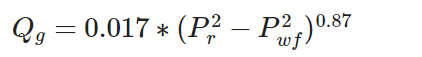


**_Now let's find out the AOF._**

In [37]:
pwf = np.linspace(0,pr,25)

qg = C*((pr**2 - pwf**2)**n)

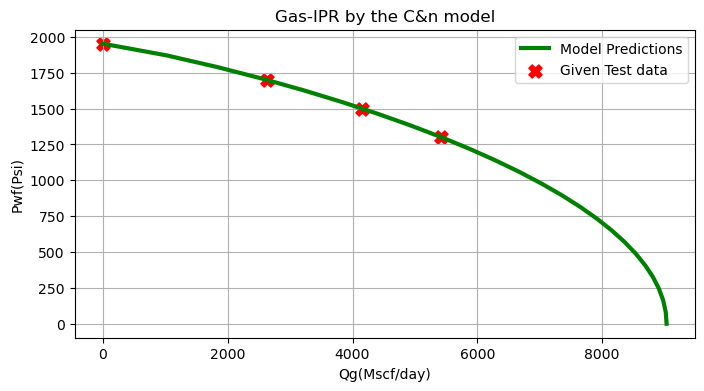

In [38]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(qg,pwf, color='green',lw=3, label='Model Predictions')

plt.scatter(df['Qg(Mscf/d)'], df['Pwf'], color='r', marker='X' , s=90, label='Given Test data')

plt.legend()
plt.xlabel('Qg(Mscf/day)')
plt.ylabel('Pwf(Psi)')

plt.title('Gas-IPR by the C&n model')

plt.grid()






**_Gas radial flow_**: Mini-project






The PVT data from a gas well in the XYZ Gas Field is given.

The well is producing at a stabilized bottom-hole flowing pressure of 3600 psi. The wellbore radius is 0.3 ft. The following additional data is available:

k = 65 md h = 15 ft T = 600°R

pe = 4400 psi re = 1000 ft Calculate the gas flow rate in Mscf/day



In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = {'P(psi)':[0,400,800,1200,1600,2000,2400,2800,3200,3600,4000,4400],
       'mu_g':[0.01270,0.01286,0.01390,0.01530,0.01680,0.01840,0.02010,0.02170,0.02340,0.02500,0.02660,0.02831],
       'z':[1.000,0.937,0.882,0.832,0.794,0.770,0.763,0.775,0.797,0.827,0.860,0.896]}

In [42]:
df= pd.DataFrame(data)
df

,P(psi),mu_g,z
0,0,0.01270,1.000
1,400,0.01286,0.937
2,800,0.01390,0.882
3,1200,0.01530,0.832
4,1600,0.01680,0.794
5,2000,0.01840,0.770
6,2400,0.02010,0.763
7,2800,0.02170,0.775
8,3200,0.02340,0.797
9,3600,0.02500,0.827


In [43]:
k = 65 #md,permeability
h = 15 #ft,thickness
T = 600 #R, temperature 
re = 1000 #ft
rw = 0.3 #ft,wellbore radius

In [44]:
df['2P/muZ'] = 2*df['P(psi)']/df['mu_g']/df['z']

In [45]:
df

,P(psi),mu_g,z,2P/muZ
0,0,0.01270,1.000,0.000000
1,400,0.01286,0.937,66391.033227
2,800,0.01390,0.882,130507.838627
3,1200,0.01530,0.832,188536.953243
4,1600,0.01680,0.794,239894.446444
5,2000,0.01840,0.770,282326.369283
6,2400,0.02010,0.763,312982.922869
7,2800,0.02170,0.775,332986.472425
8,3200,0.02340,0.797,343167.218951
9,3600,0.02500,0.827,348246.674728


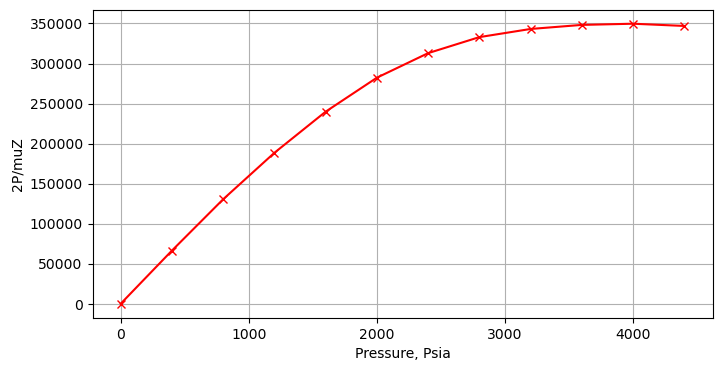

In [46]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(df['P(psi)'] , df['2P/muZ'] , marker = 'x',c='red',label='2P/muZ vs P')

plt.xlabel('Pressure, Psia')
plt.ylabel('2P/muZ')

plt.grid()

In [47]:
df = df.iloc[:,:4]

df

,P(psi),mu_g,z,2P/muZ
0,0,0.01270,1.000,0.000000
1,400,0.01286,0.937,66391.033227
2,800,0.01390,0.882,130507.838627
3,1200,0.01530,0.832,188536.953243
4,1600,0.01680,0.794,239894.446444
5,2000,0.01840,0.770,282326.369283
6,2400,0.02010,0.763,312982.922869
7,2800,0.02170,0.775,332986.472425
8,3200,0.02340,0.797,343167.218951
9,3600,0.02500,0.827,348246.674728


In [48]:
df['A_i'] = np.zeros((12,1))



for j in range(1, 12):
    
    df['A_i'][j] = (df['2P/muZ'][j] + df['2P/muZ'][j-1])*400/2

C:\Users\lanci\AppData\Local\Temp\ipykernel_23720\2463633741.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A_i'][j] = (df['2P/muZ'][j] + df['2P/muZ'][j-1])*400/2


In [49]:
df['m(P)'] = np.cumsum(df['A_i'])
df

,P(psi),mu_g,z,2P/muZ,A_i,m(P)
0,0,0.01270,1.000,0.000000,0.000000e+00,0.000000e+00
1,400,0.01286,0.937,66391.033227,1.327821e+07,1.327821e+07
2,800,0.01390,0.882,130507.838627,3.937977e+07,5.265798e+07
3,1200,0.01530,0.832,188536.953243,6.380896e+07,1.164669e+08
4,1600,0.01680,0.794,239894.446444,8.568628e+07,2.021532e+08
5,2000,0.01840,0.770,282326.369283,1.044442e+08,3.065974e+08
6,2400,0.02010,0.763,312982.922869,1.190619e+08,4.256592e+08
7,2800,0.02170,0.775,332986.472425,1.291939e+08,5.548531e+08
8,3200,0.02340,0.797,343167.218951,1.352307e+08,6.900839e+08
9,3600,0.02500,0.827,348246.674728,1.382828e+08,8.283666e+08


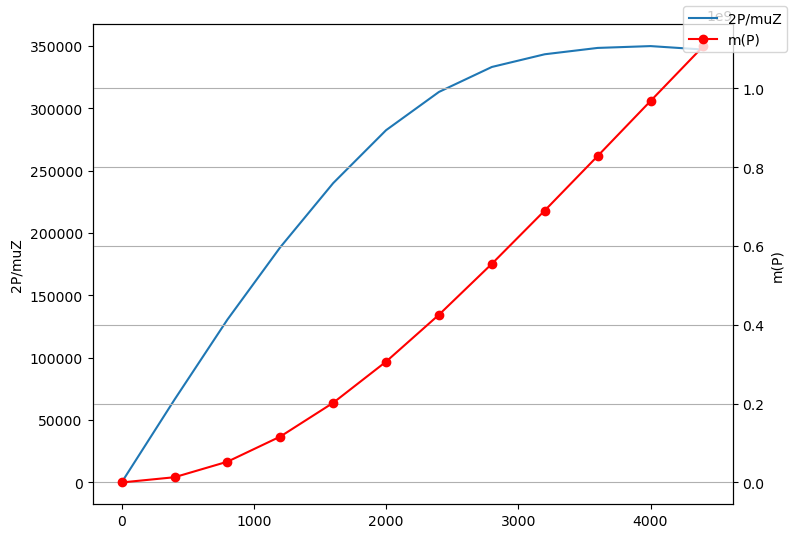

In [50]:
fig = plt.figure()

a1 = fig.add_axes([0,0,1,1])

x = df['P(psi)']
a1.plot(x,df['2P/muZ'])
a1.set_ylabel('2P/muZ')

a2 = a1.twinx()
a2.plot(x, df['m(P)'],'ro-')
a2.set_ylabel('m(P)')

fig.legend(labels = ('2P/muZ','m(P)'))

plt.grid()
plt.show()

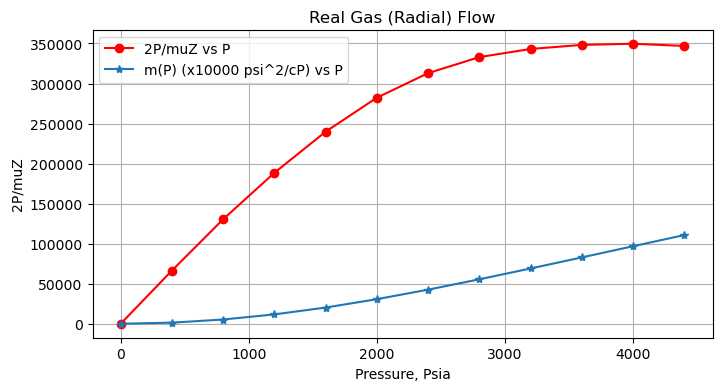

In [51]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(df['P(psi)'] , df['2P/muZ'] , marker = 'o',c='red',label='2P/muZ vs P')
plt.plot(df['P(psi)'] , df['m(P)']/10000 , marker = '*',label='m(P) (x10000 psi^2/cP) vs P')

plt.xlabel('Pressure, Psia')
plt.ylabel('2P/muZ')


plt.legend()
plt.title('Real Gas (Radial) Flow')

plt.grid()




**_Now All we need to do is find the corresponding m(P) at Pe and Pwf and solve for the Flow Rate._**

In [52]:
# 1. m(Pwf)

m_Pwf = float(df[df['P(psi)'] == 3600]['m(P)'])

m_Pe =  float(df[df['P(psi)'] == 4400]['m(P)'])

In [53]:
Qg = k*h*(m_Pe - m_Pwf)/(1422*T*np.log(re/rw))

In [54]:
Qg

39293.270285254715

In [55]:
print('Gas Flow rate:',Qg,'Mscf/Day.')

Gas Flow rate: 39293.270285254715 Mscf/Day.







**_Reservoir Simulation : Constant Pressure Boundary case._**:Mini-projet






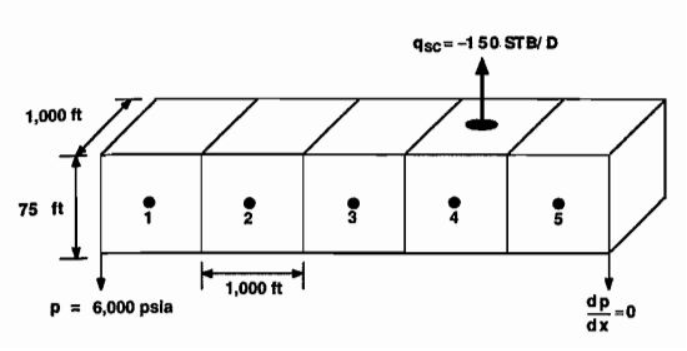

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
     

In [60]:
#Initialization
# Pi = 6000

dx = 1000 #wild,ft
dy = 1000 #length,ft
dz = 75 #height,ft

B = 1 #fvf,RB/STB
c = 3.5*(10**(-6)) #psi-1

kx = 15 # permeability,mD
phi= 0.18

mu = 10 # viscosity,cp

dt = 10 # time,days

wb = 3 # 0,1,2,3 (block 4) #Well Block index wb

In [89]:
#Calclulation

Ax = dy*dz #ft2

Vb = dx*dy*dz #ft3

qsc_wb = -150 #stb/d

Tx = (0.001127)*(kx)*(Ax)/(mu*B*dx)

M = 5.615*B*dt/Vb/phi/c
M    

1.1883597883597885

In [90]:
P = np.ones(5)*6000
     

t = np.arange(0,370,dt)
len(t)

37

In [63]:
#creating a space-time 2D matrix
P_r = np.zeros((37,5))
     

P_r[0] = np.ones(5)*6000

P_r

array([[6000., 6000., 6000., 6000., 6000.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    

In [91]:
wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])

#West Boundary Pressure
P_w = 6000 #psi

for j in range(1,len(t)):
    

    for i in range(1, len(P)-1):
        

        P_r[j,i] = P_r[j-1,i] + M*qsc[i] + M*(Tx*(P_r[j-1,i-1] - P_r[j-1,i]) + Tx*(P_r[j-1,i+1] - P_r[j-1,i]))
  
        P_r[j,0] = P_w

        P_r[j,-1]= P_r[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_r[j-1,-2] - P_r[j-1,-1]))
P_r

array([[6000.        , 6000.        , 6000.        , 6000.        ,
        6000.        ],
       [6000.        , 6000.        , 6000.        , 5821.74603175,
        6000.        ],
       [6000.        , 6000.        , 5973.14262315, 5697.2068172 ,
        5973.14262315],
       [6000.        , 5995.95342141, 5935.6141838 , 5602.10288481,
        5931.56760521],
       [6000.        , 5987.47185339, 5894.45557696, 5523.73896092,
        5881.92743034],
       [6000.        , 5975.34477394, 5852.61469821, 5455.30851447,
        5827.95947215],
       [6000.        , 5960.56791807, 5811.24454483, 5393.06334708,
        5771.8124629 ],
       [6000.        , 5944.01068878, 5770.73596046, 5334.88220506,
        5714.74664924],
       [6000.        , 5926.33939273, 5731.17339726, 5279.53181817,
        5657.51278999],
       [6000.        , 5908.03227714, 5692.53043481, 5226.27638831,
        5600.56271195],
       [6000.        , 5889.41949431, 5654.74980917, 5174.66593718,
        5544

In [92]:
P_response = pd.DataFrame(P_r)
     

temp = P_response.copy()

temp['Time(days)'] = t
t

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360])

In [94]:
temp.columns = [0, 1, 2, 3, 4, 'Time(days)']

In [95]:
P_nfb = np.zeros((37,5))
P_nfb[0] = P

P_nfb



wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])
T = np.array([0,Tx,Tx,Tx,Tx,0])





for j in range(1,len(t)):
    
  
    P[0] = P[0] + M*qsc[0] + M*(Tx*(P[1] - P[0]))
    P[-1] = P[-1] + M*qsc[-1] + M*(Tx*(P[-2] - P[-1]))

    for i in range(1, len(P)-1):
        
        P_nfb[j,i] = P_nfb[j-1,i] + M*qsc[i] + M*(Tx*(P_nfb[j-1,i-1] - P_nfb[j-1,i]) + Tx*(P_nfb[j-1,i+1] - P_nfb[j-1,i]))
    
        P_nfb[j,0] = P_nfb[j-1,0] +  M*qsc[0] + M*(Tx*(P_nfb[j-1,1] - P_nfb[j-1,0]))
        P_nfb[j,-1]= P_nfb[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_nfb[j-1,-2] - P_nfb[j-1,-1]))
P_nfb

array([[6000.        , 6000.        , 6000.        , 6000.        ,
        6000.        ],
       [6000.        , 6000.        , 6000.        , 5821.74603175,
        6000.        ],
       [6000.        , 6000.        , 5973.14262315, 5697.2068172 ,
        5973.14262315],
       [6000.        , 5995.95342141, 5935.6141838 , 5602.10288481,
        5931.56760521],
       [5999.39030538, 5987.47185339, 5894.45557696, 5523.73896092,
        5881.92743034],
       [5997.59456215, 5975.25291176, 5852.61469821, 5455.30851447,
        5827.95947215],
       [5994.2283643 , 5960.14131217, 5811.23070403, 5393.06334708,
        5771.8124629 ],
       [5989.09249656, 5942.84094267, 5770.66201407, 5334.88011968,
        5714.74664924],
       [5982.12381348, 5923.86757006, 5730.94517488, 5279.51921976,
        5657.51247579],
       [5973.34639383, 5903.5775332 , 5691.99665892, 5226.23315286,
        5600.5605469 ],
       [5962.83437774, 5882.21083528, 5653.69917361, 5174.55498045,
        5544

In [96]:
df_nfb = pd.DataFrame(P_nfb)

temp_nfb = df_nfb.copy()

temp_nfb['Time(days)'] = t

In [97]:
temp_nfb
temp_nfb.columns = [ '0' , '1' , '2' , '3' , '4' , 'Time(days)']

In [101]:
wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])

#West Boundary Pressure
# P_w = 6000 #psi

for j in range(1,len(t)):
    for i in range(1, len(P)-1):
        P_r[j,i] = P_r[j-1,i] + M*qsc[i] + M*(Tx*(P_r[j-1,i-1] - P_r[j-1,i]) + Tx*(P_r[j-1,i+1] - P_r[j-1,i]))
        P_r[j,0] = P_w
        P_r[j,-1]= P_r[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_r[j-1,-2] - P_r[j-1,-1]))
    

A very nice Realization. 

Imagine a Constant Pressure boundary at the left to be like a STRONG AQUIFER.

1.
Observe that to make sure the boundary Pressure is constant, the adjacent block
 ie, block 1 must have P1 = P_w = 6000, so that no pressure drop and hence no flow
 and constant pr. throughout. 

2. 
A constant Pressure Strong Aquifer right next to a block (ideally) would never 
let the block pressure drop. Right? Yes. That's why P = 6000 Throughout. 
     

In [100]:
temp_nfb.columns = ['0' , '1' , '2' , '3' , '4' , 'Time(days)']

temp_nfb.columns

Index(['0', '1', '2', '3', '4', 'Time(days)'], dtype='object')

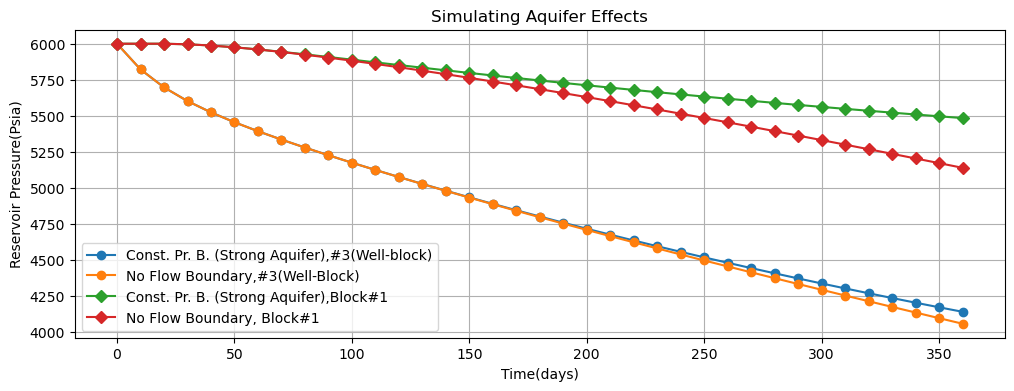

In [86]:
plt.figure(figsize=(12,4))

plt.style.use('default')

plt.plot(temp['Time(days)'] , temp[3] ,marker = 'o', label='Const. Pr. B. (Strong Aquifer),#3(Well-block)')
plt.plot(temp_nfb['Time(days)'] , temp_nfb['3'],marker = 'o', label='No Flow Boundary,#3(Well-Block)')

plt.plot(temp['Time(days)'] , temp[1] ,marker = 'D', label='Const. Pr. B. (Strong Aquifer),Block#1')
plt.plot(temp_nfb['Time(days)'] , temp_nfb['1'],marker = 'D', label='No Flow Boundary, Block#1')

plt.ylabel('Reservoir Pressure(Psia)')
plt.xlabel('Time(days)')

plt.title('Simulating Aquifer Effects')

plt.grid()

plt.legend(loc='best')

In [88]:
#plt.style.use('default')

#temp_nfb[0]

temp.head()

,0,1,2,3,4,Time(days)
0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,0
1,6000.0,6000.000000,6000.000000,5821.746032,6000.000000,10
2,6000.0,6000.000000,5973.142623,5697.206817,5973.142623,20
3,6000.0,5995.953421,5935.614184,5602.102885,5931.567605,30
4,6000.0,5987.471853,5894.455577,5523.738961,5881.927430,40






**_ReservoirPressureProfile_**: mini-projet





How pressure profile changes when you change different parameters in Darcy's LAW

Darcy's law - q = kh(DP)/(141.2uBln(re/rw))

DP = (141.2quB/kh).ln(re/rw)

P = Pwf + DP(r)




In [117]:
How pressure profile changes when you change different parameters in Darcy's LAW
Darcy's law - q = kh(DP)/(141.2uBln(re/rw))
 DP = (141.2quB/kh).ln(re/rw)
 P = Pwf + DP(r)
     

In [118]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# #TIPS to use the TOOL-
# 1. Use only 2 cases to compare, which will give you a clearer picture. 
# 2. enter the same properties in both cases, except for which you want to see the effect of. 
# EXAMPLE- I wanted to see the effect of viscocity so i have changed nothing but viscocity. 

     


 Enter the Properties

Flow rate Q(STB/D)- 200

Oil viscocity(cp)- 10

Permeability(mD)- 150

Reservoir thickness(ft)- 30

 Want to try again? (yes/no)-yes

 Enter the Properties

Flow rate Q(STB/D)- 200

Oil viscocity(cp)- 100

Permeability(mD)- 150

Reservoir thickness(ft)- 30

 Want to try again? (yes/no)-n


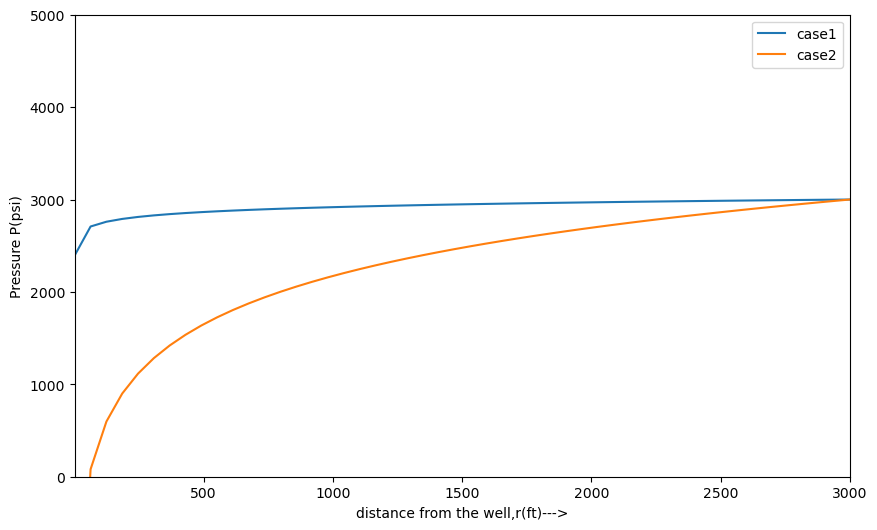

In [119]:
ans = 'yes'
p = []
while ans.lower() == 'yes':
    
    r = np.linspace(1,3000,num=50)
    print("\n Enter the Properties")
    q = int(input("\nFlow rate Q(STB/D)- "))
    u = int(input("\nOil viscocity(cp)- "))
    B = 1.2 #bbl/stb
    k = int(input("\nPermeability(mD)- "))
    h = int(input("\nReservoir thickness(ft)- "))
    Pe = 3000 #psi
    rw = 0.5 #ft
    DP = (141.2*q*u*B/(k*h))*(np.log(3000/r))
    P = Pe - DP
    p.append(P)
    ans = input('\n Want to try again? (yes/no)-')


plt.figure(figsize=(10,6))
for i in range(len(p)):
    
  
    plt.plot(r,p[i])
    plt.xlim(1,3000)
    plt.ylim(0,5000)
    plt.xlabel('distance from the well,r(ft)--->')
    plt.ylabel('Pressure P(psi)')
    plt.legend(['case1','case2'])

In [120]:
# You can clearly see how increasing the viscocity of oil increased the pressure drop by a huge margin.
#in easy words, thicker the oil, more pressure it requires to move, more pressure it looses on its journey to the well.
     

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                index_col=0, parse_dates=True)